In [1]:
import pandas as pd

In [11]:
""" To get data """

' To get data '

In [13]:
df=pd.read_excel("C:\\Users\\win\\OneDrive\\Desktop\\pandas_project_final\\Sales_data.xlsx")

In [15]:
"""To see first 5 rows"""

'To see first 5 rows'

In [19]:
df.head()

,Product_Category,Sales_Amount,Units_Sold,Discount (%)
0,Electronics,43973.71,92,17.90
1,Electronics,46139.48,107,0.43
2,Electronics,26200.66,57,17.33
3,Electronics,38193.79,65,11.88
4,Electronics,35194.89,68,14.11


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  1000 non-null   object 
 1   Sales_Amount      1000 non-null   float64
 2   Units_Sold        1000 non-null   int64  
 3   Discount (%)      1000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [23]:
df["Product_Category"].value_counts()

Product_Category
Electronics    200
Furniture      200
Clothing       200
Grocery        200
Books          200
Name: count, dtype: int64

In [25]:
""" Outlier Analysis
Category-wise IQR Outlier Detection:

For each Product_Category, identify and count how many Sales_Amount entries are outliers using the IQR method.

Which category has the highest proportion of outliers?"""

' Outlier Analysis\nCategory-wise IQR Outlier Detection:\n\nFor each Product_Category, identify and count how many Sales_Amount entries are outliers using the IQR method.\n\nWhich category has the highest proportion of outliers?'

In [91]:



outlier_counts = {}


for category in df['Product_Category'].unique():
    cat_data = df[df['Product_Category'] == category]['Sales_Amount']
    
    # Calculate IQR
    Q1 = cat_data.quantile(0.25)
    Q3 = cat_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = cat_data[(cat_data < lower_bound) | (cat_data > upper_bound)]
    
    # Store stats in dictionary
    outlier_counts[category] = {
        'Outlier_Count': outliers.count(),
        'Total_Count': len(cat_data),
        'Outlier_Percentage': round(outliers.count() / len(cat_data) * 100, 2)
    }

# Convert to DataFrame for display
outlier_df = pd.DataFrame(outlier_counts).T.reset_index()
outlier_df.columns = ['Product_Category', 'Outlier_Count', 'Total_Count', 'Outlier_Percentage']

# Sort by percentage of outliers
outlier_df = outlier_df.sort_values(by='Outlier_Percentage', ascending=False)


print(outlier_df)


  Product_Category  Outlier_Count  Total_Count  Outlier_Percentage
0      Electronics           14.0        200.0                 7.0
4            Books           13.0        200.0                 6.5
1        Furniture           11.0        200.0                 5.5
2         Clothing            9.0        200.0                 4.5
3          Grocery            8.0        200.0                 4.0


In [95]:
#outlier treatment # removing this 

In [103]:
df_no_outliers = df.copy()
for category in df['Product_Category'].unique():
    
    cat_index = df['Product_Category'] == category
    cat_data = df.loc[cat_index, 'Sales_Amount']
    
    # IQR bounds
    Q1 = cat_data.quantile(0.25)
    Q3 = cat_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_no_outliers = df_no_outliers[~((df_no_outliers['Product_Category'] == category) &
                                      ((df_no_outliers['Sales_Amount'] < lower_bound) |
                                       (df_no_outliers['Sales_Amount'] > upper_bound)))]


In [105]:
df_no_outliers

,Product_Category,Sales_Amount,Units_Sold,Discount (%)
0,Electronics,43973.71,92,17.90
1,Electronics,46139.48,107,0.43
2,Electronics,26200.66,57,17.33
3,Electronics,38193.79,65,11.88
4,Electronics,35194.89,68,14.11
...,...,...,...,...
995,Books,3527.86,113,14.95
996,Books,2850.04,72,7.30
997,Books,4148.29,89,6.44
998,Books,3025.85,108,6.48


In [107]:
# Box plot for outliers

In [111]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales Amount')

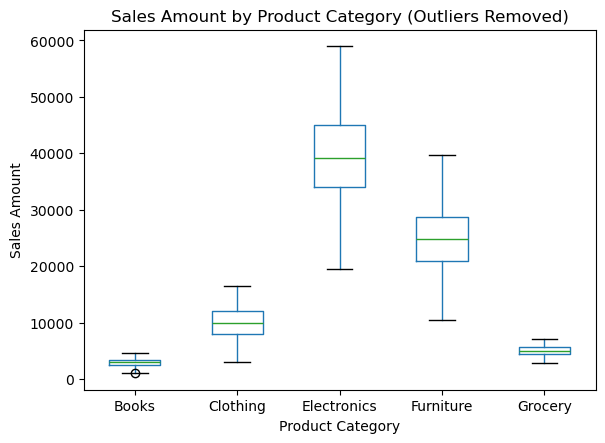

In [113]:
df_no_outliers.boxplot(column='Sales_Amount', by='Product_Category', grid=False)

# Titles and labels
plt.title('Sales Amount by Product Category (Outliers Removed)')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')


In [115]:
# to see previous data of outliers

Text(0, 0.5, 'Sales Amount')

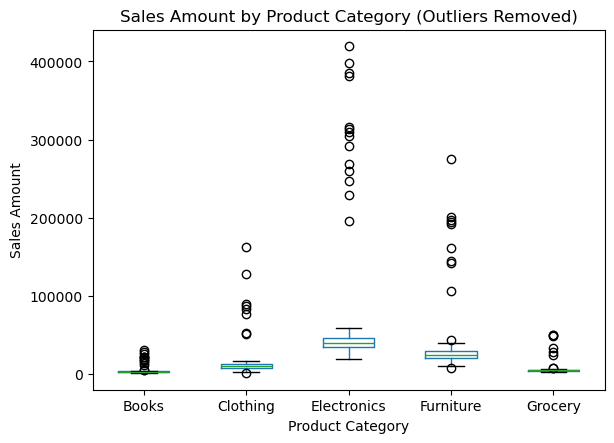

In [117]:
df.boxplot(column='Sales_Amount', by='Product_Category', grid=False)

# Titles and labels
plt.title('Sales Amount by Product Category (Outliers Removed)')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')

In [119]:
# exporting data with no outliers

In [ ]:
df_no_outliers.to_excel("C:\\Users\win\\OneDrive\\Desktop\\pandas_project_final\\Sale")